In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from pathlib import Path
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Link to the trained weights and example data
http://gofile.me/6XMqh/IwGyeV5Fh

In [13]:
# Set path to the data folders
data = Path("example_data/")
models = Path("trained_models/")

In [14]:
import ncxt_autoseg
from ncxt_autoseg.pipe import NCXTPipe
from ncxt_autoseg.sxtcnn.criteria import CrossEntropyLoss_DiceLoss

In [15]:
wd = "__tempwd__/" #path to the working directopry to save cached fiules and weights
# we are not saving anythign here, so this doesn't matter
disjoint_folder = data #path to data directory with /hx files

# parameters Used
organelles = ["cell", "lipid", "nucleus", "vacuole"]
model_args = {"instancenorm": True, "depth": 5, "start_filts": 64}
loader_args = {"working_directory": None}
processor_args = {"block_shape": [96, 96, 96], "binning": 2, "n_blocks": 2}
settings = {
    "maximum_iterations": 1000,
    "max_batch_size": 2,
    "augment_elastic": 5,
    "augment_linear": 0.5,
}
pipe = NCXTPipe(
    folder=disjoint_folder,
    working_directory=wd,
    organelles=organelles,
    fold=3,
    criterion=CrossEntropyLoss_DiceLoss,
    processor_args=processor_args,
    model_args=model_args,
    loader_args=loader_args,
    settings=settings,
    cached_loader=False,
)
pipe.setup()

Files 1 + 0


### Examples
Example of results with pretrained weights

Loading state 199 with best weights


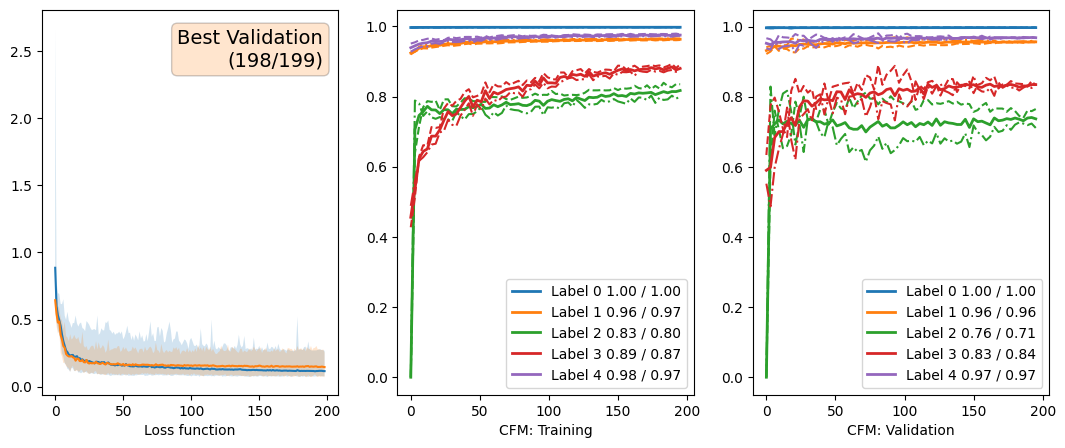

In [16]:
import torch
def load_from(self, base):
    file_state = base / f"{self._model_hash}_state.npy"
    file_weights_best = base / f"{self._model_hash}_best.weights"
    self.load_state_dict(np.load(file_state, allow_pickle=True).item())
    print(f"Loading state {self.epoch} with best weights")    
    self.model.load_state_dict(torch.load(file_weights_best,map_location='cuda:0'))

# These folders correspond to the (automatically generated) data hashes of the k-fold filenames
# and are the three instances of the k-fold training
base = models/"data56390"
# base = models/"data57777"
# base = models/"data65444"

sxtcnn = pipe.sxtcnn
load_from(sxtcnn, base)
sxtcnn.logger.plot()

array([[5191421,      15,       0,       0,       0],
       [  32349, 1158112,     118,     761,     170],
       [      0,    1622,    6676,       0,       0],
       [      0,   30095,      13,   92141,       0],
       [      0,    8335,       0,       0,  266044]])

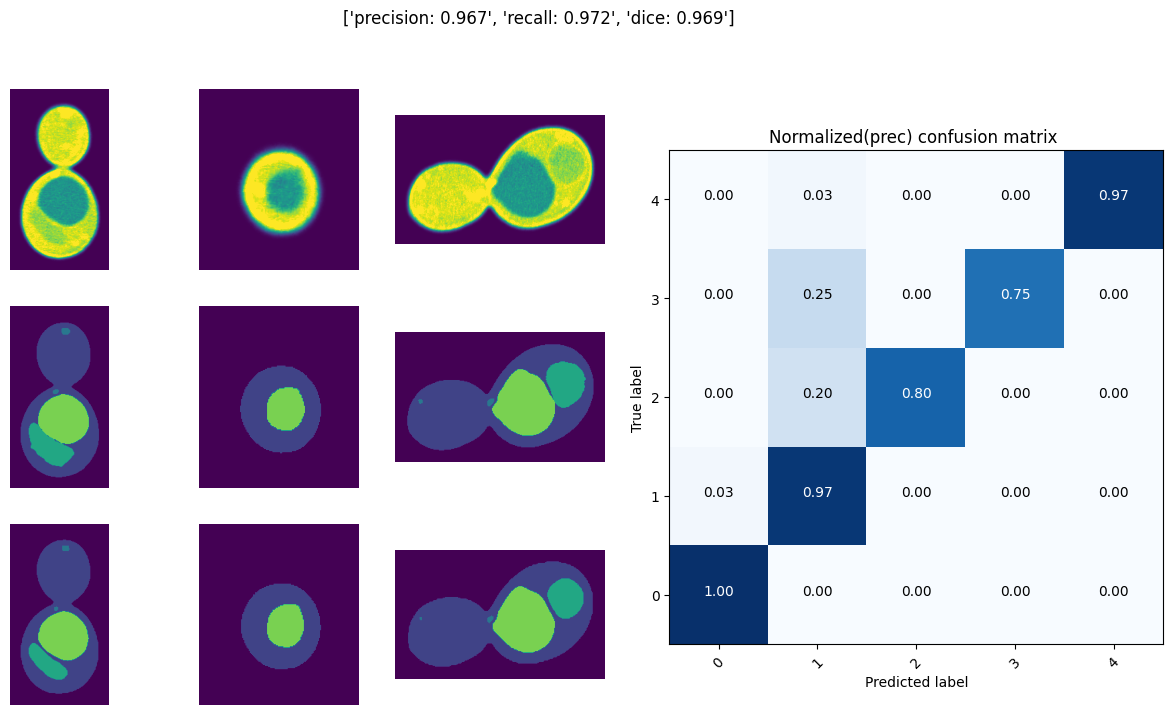

In [17]:
sxtcnn.evaluate_sample(0, plot=True)